In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
!pip install wordcloud



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pd.__version__

'2.2.2'

In [4]:
data = pd.read_csv('netflix1.csv')

In [5]:
print(data.head())

  show_id     type                             title         director  \
0      s1    Movie              Dick Johnson Is Dead  Kirsten Johnson   
1      s3  TV Show                         Ganglands  Julien Leclercq   
2      s6  TV Show                     Midnight Mass    Mike Flanagan   
3     s14    Movie  Confessions of an Invisible Girl    Bruno Garotti   
4      s8    Movie                           Sankofa     Haile Gerima   

         country date_added  release_year rating  duration  \
0  United States  9/25/2021          2020  PG-13    90 min   
1         France  9/24/2021          2021  TV-MA  1 Season   
2  United States  9/24/2021          2021  TV-MA  1 Season   
3         Brazil  9/22/2021          2021  TV-PG    91 min   
4  United States  9/24/2021          1993  TV-MA   125 min   

                                           listed_in  
0                                      Documentaries  
1  Crime TV Shows, International TV Shows, TV Act...  
2                 TV Dr

In [6]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


Data Cleaning:

Identify and handle missing data, correct data types, and drop duplicates.

In [7]:
# removing columns which are not necessary

data = data.drop(columns= "rating")

In [8]:
data.head()

,show_id,type,title,director,country,date_added,release_year,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,125 min,"Dramas, Independent Movies, International Movies"


In [9]:
data.type

0         Movie
1       TV Show
2       TV Show
3         Movie
4         Movie
         ...   
8785    TV Show
8786    TV Show
8787    TV Show
8788    TV Show
8789    TV Show
Name: type, Length: 8790, dtype: object

In [10]:
# Capitalize the first letter of each column name
new_column_names = []

for i in data.columns:
    new_column_names.append(i.capitalize())

data.columns = new_column_names

new_column_names

['Show_id',
 'Type',
 'Title',
 'Director',
 'Country',
 'Date_added',
 'Release_year',
 'Duration',
 'Listed_in']

In [11]:
# Drop duplicates if any
data.drop_duplicates(inplace=True)

In [12]:
# Check for missing values
print(data.isnull().sum())

Show_id         0
Type            0
Title           0
Director        0
Country         0
Date_added      0
Release_year    0
Duration        0
Listed_in       0
dtype: int64


In [13]:
# Drop rows with missing critical information
data.dropna(subset=['Country'], inplace=True)


In [14]:
# Remove lowercase 's' from the 'Show_id' column
data["Show_id"].unique()

array(['s1', 's3', 's6', ..., 's8801', 's8784', 's8786'], dtype=object)

In [15]:
data["Show_id"] = data["Show_id"].apply(lambda x: x.split("s")[1])

In [16]:
data

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Duration,Listed_in
0,1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,90 min,Documentaries
1,3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,91 min,"Children & Family Movies, Comedies"
4,8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,125 min,"Dramas, Independent Movies, International Movies"
...,...,...,...,...,...,...,...,...,...
8785,8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,2 Seasons,"International TV Shows, TV Dramas"
8786,8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,3 Seasons,Kids' TV
8787,8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,1 Season,Kids' TV


In [17]:
data["Show_id"] = data["Show_id"].astype(int)

In [18]:
type(data["Show_id"][0])


numpy.int64

In [19]:
# Replace "/" with "-" in 'date_added'
data['Date_added'] = data['Date_added'].str.replace("/", "-", regex=False)


In [20]:
data['Date_added']

0        9-25-2021
1        9-24-2021
2        9-24-2021
3        9-22-2021
4        9-24-2021
           ...    
8785     1-17-2017
8786     9-13-2018
8787    12-15-2016
8788     6-23-2018
8789      6-7-2018
Name: Date_added, Length: 8790, dtype: object

In [21]:
# Convert 'date_added' to datetime
data['Date_added'] = pd.to_datetime(data['Date_added'])

In [22]:
data['Date_added']

0      2021-09-25
1      2021-09-24
2      2021-09-24
3      2021-09-22
4      2021-09-24
          ...    
8785   2017-01-17
8786   2018-09-13
8787   2016-12-15
8788   2018-06-23
8789   2018-06-07
Name: Date_added, Length: 8790, dtype: datetime64[ns]

In [23]:
# Show data types to confirm changes
print(data.dtypes)

Show_id                  int64
Type                    object
Title                   object
Director                object
Country                 object
Date_added      datetime64[ns]
Release_year             int64
Duration                object
Listed_in               object
dtype: object


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_id       8790 non-null   int64         
 1   Type          8790 non-null   object        
 2   Title         8790 non-null   object        
 3   Director      8790 non-null   object        
 4   Country       8790 non-null   object        
 5   Date_added    8790 non-null   datetime64[ns]
 6   Release_year  8790 non-null   int64         
 7   Duration      8790 non-null   object        
 8   Listed_in     8790 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 618.2+ KB


In [25]:
data.shape

(8790, 9)

Content distribution on Netflix.

In [26]:
data['Type'].value_counts()

Type
Movie      6126
TV Show    2664
Name: count, dtype: int64

Text(0.5, 0.98, 'Total Content on Netflix')

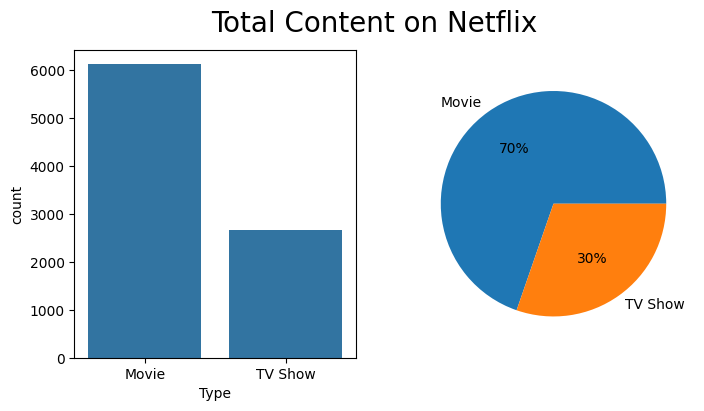

In [27]:
freq=data['Type'].value_counts()
fig, axes=plt.subplots(1,2, figsize=(8, 4))
sns.countplot(data, x=data['Type'], ax=axes[0])
plt.pie(freq, labels=['Movie', 'TV Show'], autopct='%.0f%%')
plt.suptitle('Total Content on Netflix', fontsize=20)

Top and bottom 10 countries with most content on Netflix

In [48]:
top_ten_countries1=data['Country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
top_ten_countries1

,Country,count
0,United States,3240
1,India,1057
2,United Kingdom,638
3,Pakistan,421
4,Not Given,287
5,Canada,271
6,Japan,259
7,South Korea,214
8,France,213
9,Spain,182


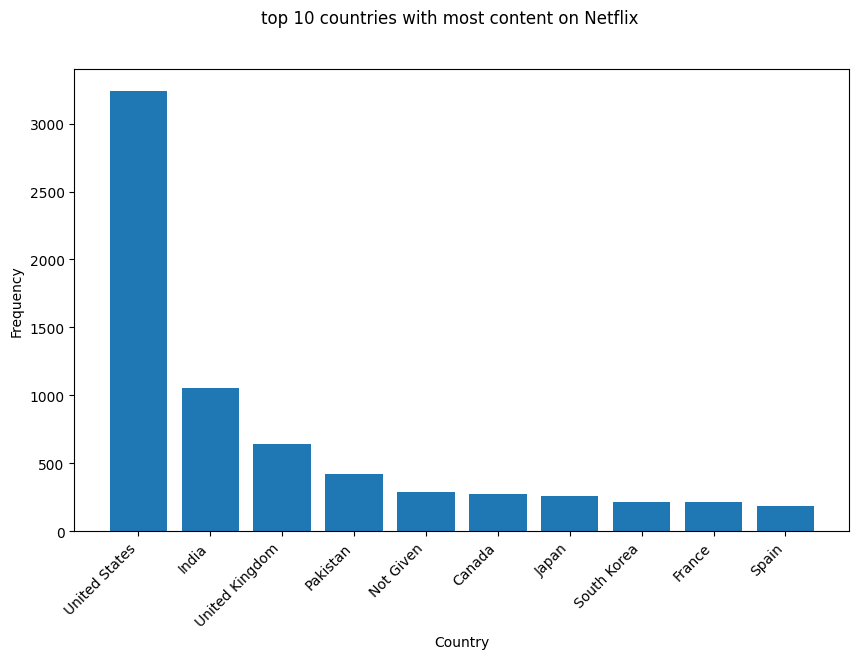

In [59]:
top_ten_countries=data['Country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['Country'], top_ten_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("top 10 countries with most content on Netflix")
plt.show()

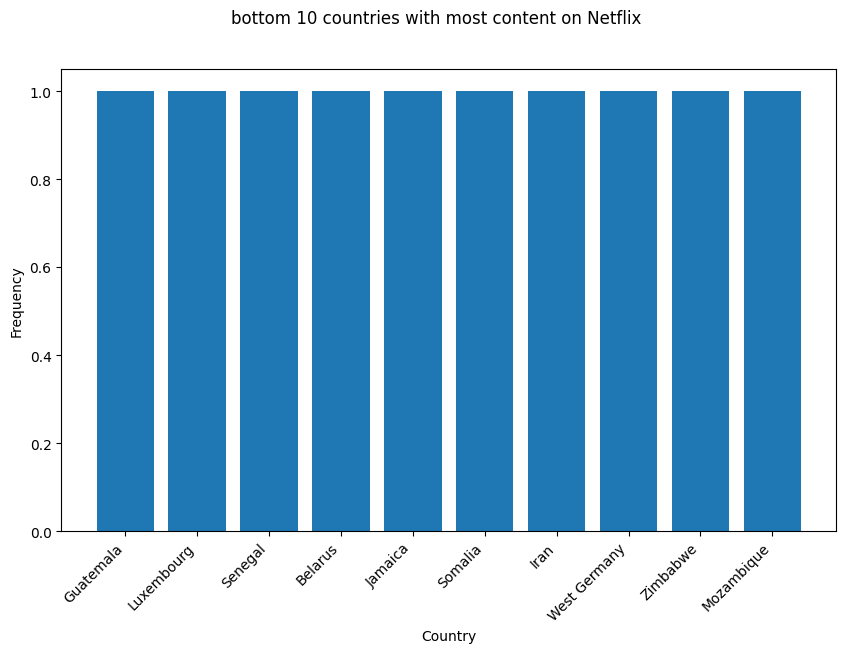

In [63]:
bottom_ten_countries=data['Country'].value_counts().reset_index().sort_values(by='count', ascending=False)[:10]
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['Country'], top_ten_countries['count'])
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.suptitle("bottom 10 countries with most content on Netflix")
plt.show()

In [61]:
top_ten_countries=data['Country'].value_counts().reset_index().sort_values(by='count', ascending=True)[:10]
top_ten_countries

,Country,count
80,Guatemala,1
81,Luxembourg,1
82,Senegal,1
83,Belarus,1
79,Jamaica,1
78,Somalia,1
77,Iran,1
76,West Germany,1
72,Zimbabwe,1
73,Mozambique,1


Monthly releases of Movies and TV shows on Netflix

In [29]:
data['Year']=data['Date_added'].dt.year
data['Month']=data['Date_added'].dt.month
data['Day']=data['Date_added'].dt.day

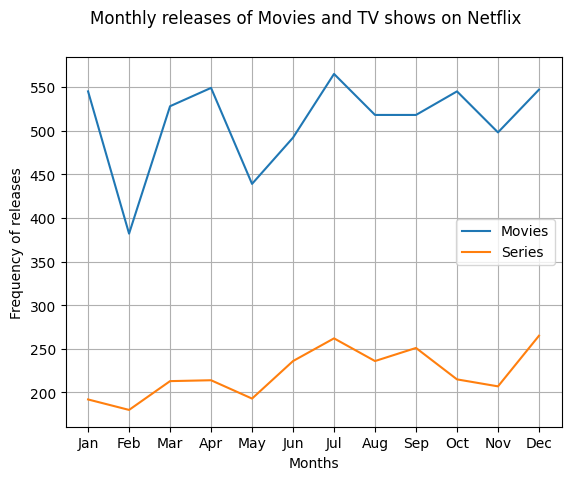

In [30]:
monthly_movie_release=data[data['Type']=='Movie']['Month'].value_counts().sort_index()
monthly_series_release=data[data['Type']=='TV Show']['Month'].value_counts().sort_index()
plt.plot(monthly_movie_release.index, monthly_movie_release.values, label='Movies')
plt.plot(monthly_series_release.index, monthly_series_release.values,label='Series')
plt.xlabel("Months")
plt.ylabel("Frequency of releases")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.suptitle("Monthly releases of Movies and TV shows on Netflix")
plt.show()

Yearly releases of Movies and TV Shows on Netflix

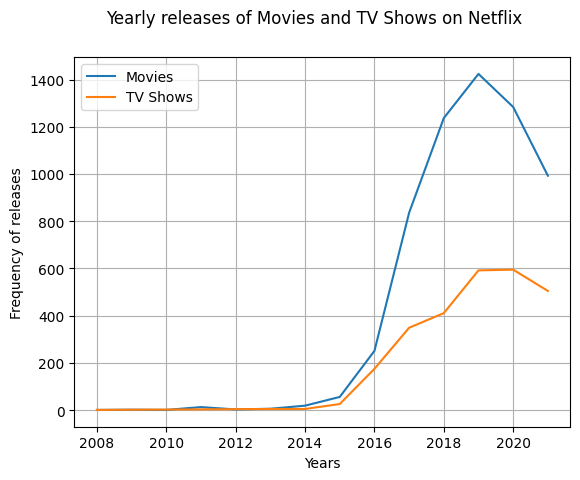

In [31]:
yearly_movie_releases=data[data['Type']=='Movie']['Year'].value_counts().sort_index()
yearly_series_releases=data[data['Type']=='TV Show']['Year'].value_counts().sort_index()
plt.plot(yearly_movie_releases.index, yearly_movie_releases.values, label='Movies')
plt.plot(yearly_series_releases.index, yearly_series_releases.values, label='TV Shows')
plt.xlabel("Years")
plt.ylabel("Frequency of releases")
plt.grid(True)
plt.suptitle("Yearly releases of Movies and TV Shows on Netflix")
plt.legend()

Top 10 popular movie genres

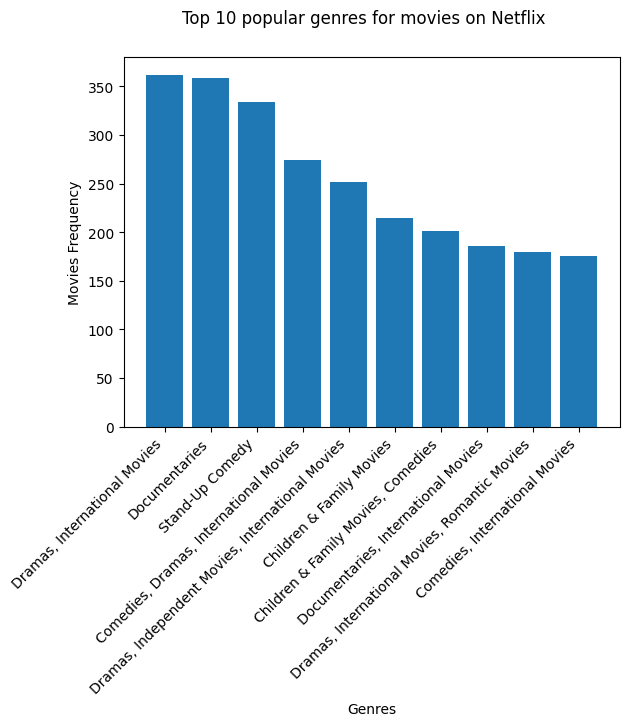

In [32]:
popular_movie_genre=data[data['Type']=='Movie'].groupby("Listed_in").size().sort_values(ascending=False)[:10]
popular_series_genre=data[data['Type']=='TV Show'].groupby("Listed_in").size().sort_values(ascending=False)[:10]
plt.bar(popular_movie_genre.index, popular_movie_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("Movies Frequency")
plt.suptitle("Top 10 popular genres for movies on Netflix")
plt.show()

Top 10 TV Shows genres

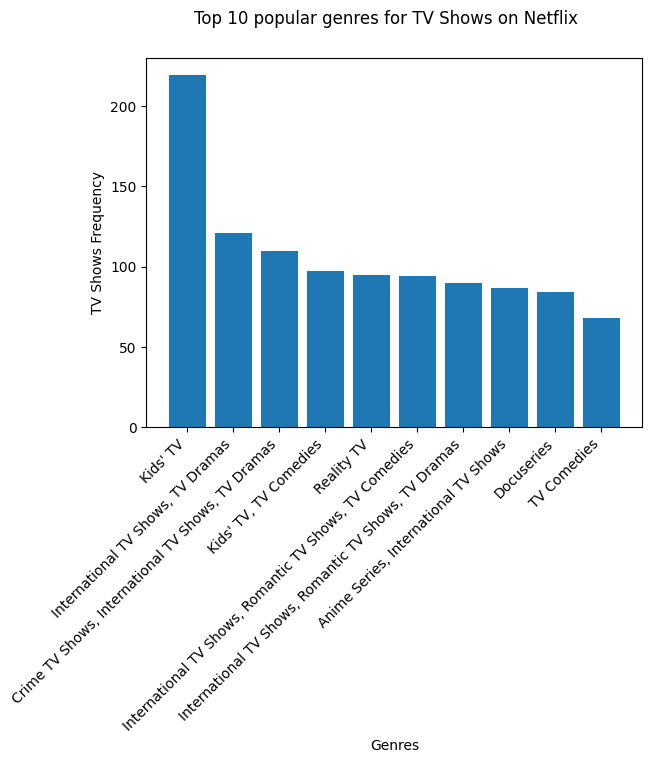

In [33]:
plt.bar(popular_series_genre.index, popular_series_genre.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genres")
plt.ylabel("TV Shows Frequency")
plt.suptitle("Top 10 popular genres for TV Shows on Netflix")
plt.show()

In [34]:
data.columns

Index(['Show_id', 'Type', 'Title', 'Director', 'Country', 'Date_added',
       'Release_year', 'Duration', 'Listed_in', 'Year', 'Month', 'Day'],
      dtype='object')

 Top 10 Directors by Number of Titles

In [35]:
data.replace("not given", np.nan, inplace=True)



In [36]:
directors=data['Director'].value_counts().reset_index().sort_values(by='count',ascending=False)[1:15]
directors

,Director,count
1,Rajiv Chilaka,20
2,Alastair Fothergill,18
3,"Raúl Campos, Jan Suter",18
4,Marcus Raboy,16
5,Suhas Kadav,16
6,Jay Karas,14
7,Cathy Garcia-Molina,13
8,Jay Chapman,12
9,Martin Scorsese,12
10,Youssef Chahine,12


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Rajiv Chilaka'),
  Text(1, 0, 'Alastair Fothergill'),
  Text(2, 0, 'Raúl Campos, Jan Suter'),
  Text(3, 0, 'Marcus Raboy'),
  Text(4, 0, 'Suhas Kadav'),
  Text(5, 0, 'Jay Karas'),
  Text(6, 0, 'Cathy Garcia-Molina'),
  Text(7, 0, 'Jay Chapman'),
  Text(8, 0, 'Martin Scorsese'),
  Text(9, 0, 'Youssef Chahine'),
  Text(10, 0, 'Steven Spielberg'),
  Text(11, 0, 'Mark Thornton, Todd Kauffman'),
  Text(12, 0, 'Don Michael Paul'),
  Text(13, 0, 'David Dhawan')])

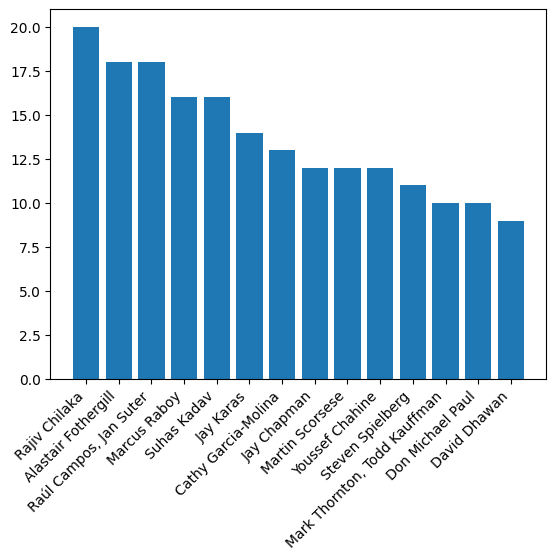

In [37]:
directors=data['Director'].value_counts().reset_index().sort_values(by='count', ascending=False)[1:15]

plt.bar(directors['Director'], directors['count'])
plt.xticks(rotation=45, ha='right')

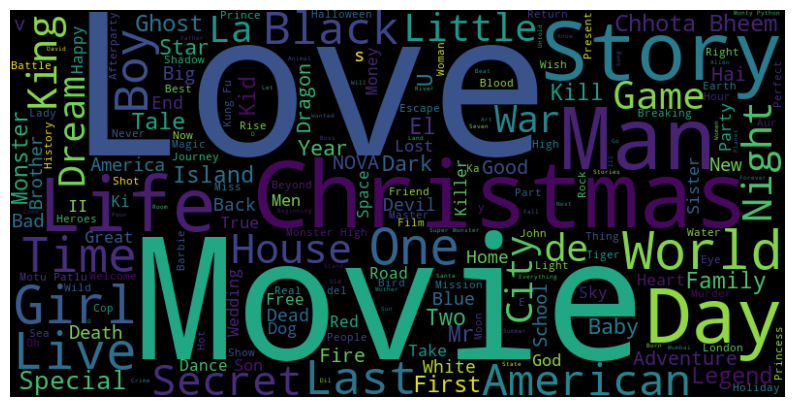

In [38]:
movie_titles = data[data['Type'] == 'Movie']['Title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
